# Лекция 6. Функции

* Функции

# Функции

Функции позволяют эффективно повторно использовать уже написанный код или производить его декомпозицию на небольшие самостоятельные задачи. Создать функцию несложно

```Python
def <имя функции>(<аргументы>):
    <тело функции>
```

In [1]:
def SayHello(name):
    print(f"Hello, {name}!")

In [2]:
SayHello("Nico")

Hello, Nico!


In [3]:
a = SayHello("Nico")
print(a)

Hello, Nico!
None


Внутри функции можно использовать `return`, который позволяет получить результат из функции

In [4]:
def Add(a, b):
    return a + b

In [24]:
Add(10, 15)

25

In [25]:
# И самое интересное

Add("Hello ", "World")

'Hello World'

In [27]:
# и даже больше

Add([1,2], [3, 4])

[1, 2, 3, 4]

Здесь хорошо видно, что конкретное действие определяется исключительно только типом переменных, которые учавствуют в выражениях.

Из функций можно вызывать другие функции, даже если они объявлены позже. Это связано с тем, что тело функции не выполняется, пока функция не была вызвана

In [7]:
def SomeFunc1():
    SomeFunc2()
    print(some_var)
    
def SomeFunc2():
    print("Hi")
    
SomeFunc1()

# Область видимости

Каждая функция фактически определяет свою _локальную_ область видимости

In [11]:
def SomeFunc():
    some_var = 5

# это вызовет ошибку
print(some_var)

NameError: name 'some_var' is not defined

In [12]:
b = SomeFunc()

# все-равно вызывает ошибку
print(some_var)

NameError: name 'some_var' is not defined

Переменные объявленные внутри функции доступны только внутри этой функции.

Ладно, попробуем сделать наоборот

In [16]:
a = 5

def SomeFunc():
    a = 13
    print(a)
    
SomeFunc()
print(a) # неожиданный результат

13
5


Такое поведение выше, связано с тем, что мы объявили новую переменную, а `=` именно это и делает. Таким образом, у нас появилась переменная с таким же названием, но в локальной области видимости функции. Каждый вызов функции создает свою локальную область видимости.

In [38]:
def Fibonacci(n):
    if n <= 0:
        raise Exception("Invalid Input")
        
    if n in (1, 2):
        return 1
    
    return Fibonacci(n - 1) + Fibonacci(n - 2)
        

Fibonacci(1), Fibonacci(2), Fibonacci(3), Fibonacci(4), Fibonacci(5), Fibonacci(6)

(1, 1, 2, 3, 5, 8)

In [34]:
a = []

def SomeFunc():
    a.append(1)
    
SomeFunc()
print(a) # Хм, опять не самый ожидаемый результат

[1]


А вот тут все интереснее. При вызове переменной (мы её не создавали), Python не находит её в текущей области видимости, поэтому он поднимается на одну область видимости выше и ищет переменную уже там. В объемлющей _глобальной_ области видимости переменная есть, вот её мы и меняем.

Особенность _глобальной_ области видимости в том, что она доступная внутри текущего файла (модуля) и не доступа из других файлов.

## Доступ к глобальной области видимости

Хоть это и не рекомендуется, но если очень хочется, то мы все же можем изменить из функции глобальную переменную.

> `global variable` - данное ключевое слово говорит, что данная переменная доступна в глобальной области видимости

In [17]:
a = 5

def SomeFunc():
    global a 
    a = 13
   
SomeFunc()
print(a)

13


## Вложенные функции

Никто нам не запрещает создавать функции внутри функций

In [18]:
def SomeFunc():
    def InnerFunc():
        print("Inner")
        
    InnerFunc()
    return InnerFunc
    
SomeFunc()
SomeFunc()()

Inner
Inner
Inner


У вложенных функций создается своя локальная область видимости, что позволяет использовать продвинутую технику программирования, так называемое __замыкание__.

In [49]:
def SomeFunc():
    x = "Hello"
    
    def InnerFunc(n):
        print(x*n)
        
    return InnerFunc

f = SomeFunc()
f(2)

HelloHello


In [19]:
def SomeFunc():
    x = []
    
    def InnerFunc(n):
        x.append(n)
        print(x)
        
    return InnerFunc

f1 = SomeFunc()
f1(3)
f1(3)
f1(3)

print()

f2 = SomeFunc()
f2(1)
f2(1)
f2(1)

[3]
[3, 3]
[3, 3, 3]

[1]
[1, 1]
[1, 1, 1]


In [57]:
def MakeGen(start):
    x = start
    
    def SomeFunc():
        nonlocal x
        x += 1
        return x
    
    return SomeFunc

f = MakeGen(3)
f(), f(), f(), f()

(4, 5, 6, 7)

> `nonlocal` - оператор, подсказывающий Python'у, что данную переменную можно найти в области на один выше (то есть в объемлющей функции).

## Аргументы

* _позиционные_ - то, к чему мы привыкли, это просто передача аргументов по порядку слева на право
* _ключевые_ - передача аргумента по имени
* _со значением по умолчанию_ - если не указать значение для аргумента, то будет подставлено значение по умолчанию
* _переменное количество аргументов_ - принимает любое количество аргументов с последующей их обработкой

При передаче аргументов в функцию следует придерживаться следующего правила: сначала идут позиционные аргументы, потом ключевые.

При объявлении функции: сначала идут обычные аргументы, потом аргументы со значением по умолчанию.

## Позиционные аргументы

In [1]:
def Test(arg1, arg2, arg3):
    print(arg1, arg2, arg3)
    
Test("Hello", "World", "!")

Hello World !


## Ключевые аргументы

Мы просто указываем имена аргументов в любом порядке в виде `ключ=значение`. __Указывать только после позиционных аргументов.__

In [5]:
def Test(arg1, arg2, arg3):
    print(arg1, arg2, arg3)
    
# ошибка
#Test(arg1="Hello", "World", "!")

Test("Hello", arg3="!", arg2="World")

Hello ! World


## Аннотации аргументов

Есть возможность подсказать программистам, какие типы аргументов может принимать функция. Это ни к чему не обязывает и строго опционально

In [4]:
def Add(a: int, b:int) -> int:
    return a + b

print(Add(1, 2))
print(Add("a", "b"))

3
ab


In [29]:
Add.__annotations__

{'a': int, 'b': int, 'return': int}

## Значения по умолчанию

Для некоторых аргументов можно выставить значение по умолчанию. В этом случае, аргумент становится не обязательным. Если не указать значение аргумента, то будет взято значение по умолчанию.

In [10]:
def Test(arg1, arg2:str="W", arg3="!"):
    print(arg1, arg2, arg3)
    
Test("Hello", arg2="World")

# но при этом

Test("Hello", "World", "<")

Hello World !
Hello World <


Нужно быть очень осторожными при использовании изменяемых объектов в качестве значений по умолчанию. Оно создается только один раз в момент создания функции.

In [8]:
def Test(arg=[]):
    print(arg)
    return arg


a = Test()
a.append(13)

# казалось бы, что должен быть пустой вывод, но нет - он заполнен
a = Test()

[13]
[13, 13, 13]


## Произвольное количество аргументов

Для произвольного количества позиционных аргументов используется `*`.

In [21]:
def Test(*args):
    for i, arg in enumerate(args):
        print(f'{i:5} = {arg}')
    print()
              
Test("1", "2", 3)

Test(5, "2", "Hello", "1", 4)

    0 = 1
    1 = 2
    2 = 3

    0 = 5
    1 = 2
    2 = Hello
    3 = 1
    4 = 4



TypeError: Test() got an unexpected keyword argument 'test'

Для произвольного количества ключевых аргументов используется `**`

In [22]:
def Test(**kargs):
    for key in kargs:
        print(f'{key:5} = {kargs[key]}')
    print()
    
Test(word1="Hello", word2="World")

Test(word1="Hello", word2="World", word3="!")

word1 = Hello
word2 = World

word1 = Hello
word2 = World
word3 = !



Их даже можно комбинировать вместе

In [20]:
# самая полная запись

def Test(arg1=4, *args, karg1, **kargs):
    print(" arg1 =", arg1)
    for i, arg in enumerate(args):
        print(f'{i:5} = {arg}')
    print("karg1 =", karg1)
    for key in kargs:
        print(f'{key:5} = {kargs[key]}')
    print()

# karg1 теперь можно указать только как ключевой!
# Ошибка
#Test("arg1", "some_arg2", "karg1", "some_karg2")

Test("arg1", "some_arg2", karg1="karg1", karg2="some_karg2")

 arg1 = arg1
    0 = some_arg2
karg1 = karg1
karg2 = some_karg2



## Аргументы, передаваемые только по ключу

Также с помощью `*` можно указать аргументы, которые можно передавать только с помощью ключа

In [25]:
def Test(arg, *, karg):
    print(arg, karg)
   
# Это будет ошибкой, так как использование * без переменной не дает поддержку переменного числа аргументов
# Ошибка!
#Test("A", "B", karg="C")

# Тоже ошибка
#Test("A", "B")

Test("A", karg="B")

A B


## Аргумент, передаваемые только позиционно

В Python 3.8+ появилась возможность создания аргументов, которые можно передать только позиционно.

In [ ]:
# Все левее / передается только позиционно

def Test(arg1, arg2, /, arg3):
    print(arg1, arg2, arg3)
    
# Ошибка
# Test(arg1="A", arg2="B", arg3="C")

# Ok
Test("A", "B", arg3="C")

## Итого

Полный синтаксис объявления функции

```Python
def Func(arg1:<type>, /, arg2, *, karg1, **kargs) -> <return type>:
    pass
```

## Распаковка значений в аргументы

Python поддерживает обобщенную передачу аргументов с помощью `*` и `**` для позиционных и ключевых аргументов соответственно.

In [30]:
def Add(a: int, b:int) -> int:
    return a + b


args = [5, 7]
print(Add(*args))
print(Add(args[0], args[1]))


kargs = {"a": 5, "b": 7}
print(Add(**kargs))
print(ADD(a=kargs["a"], b=kargs["b"]))

12
12


In [32]:
# Можно делать это более комплексно

def Test(a, b, *, c, d):
    print(a, b, c, d)
    
args = [5, 7]
kargs = {"c": 12, "d": 19}

Test(*args, **kargs)

5 7 12 19


## Особенности объявления функций

И на последок, одна особенность создания функций в цикле

In [33]:
functions = []

for i in range(5):
    print(i)
    def SomeFunc():
        print(i)
    functions.append(SomeFunc)

0
1
2
3
4


In [34]:
# Получили немного не тот результат, что мы ожидали
for f in functions:
    f()

4
4
4
4
4


Это связано с ленивым определением значения переменной, чтобы этого избежать, можно передать текущего значение в виде значения по умолчанию

In [35]:
functions = []

for i in range(5):
    print(i)
    def SomeFunc(i=i):
        print(i)
    functions.append(SomeFunc)

print()

for f in functions:
    f()

0
1
2
3
4

0
1
2
3
4


# Домашнее задание (обязательно)

## Задача 1

Написать функцию, которая ищет один любой экстремум функции одной переменной на заданном интервале. Можно использовать любой алгоритм или метод, но реализовать его самостоятельно. Если экстремума нет, то выдавать `None`. Можно передавать любые дополнительные параметры, если потребуется.


(Опционально) Также выдавать допольнительно вид экстремума.

In [1]:
%matplotlib inline

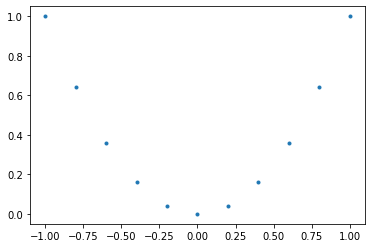

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 1, 11)
y = x * x

plt.plot(x, y, ".")

In [10]:
def Parabola(x):
    return x**2

def Line(x):
    return 2*x

def Extremum(a, b, *, func, splits=1001, **kargs):
    x = [a, ]
    dx = (b - a) / splits
    
    while x[-1] <= b:
        x.append(x[-1] + dx)
        

    y = []
    for x_value in x:
        y.append(func(x_value))
        
    for i in range(1, len(y)-1):
        if y[i] < y[i-1] and y[i] < y[i+1]:
            return x[i]
        if y[i] > y[i-1] and y[i] > y[i+1]:
            return x[i]
        
    return None

result = Extremum(-2, 2, func=Parabola, splits=10000)
print(result) # должно быть 0

result = Extremum(-20, -10, func=Parabola)
print(result) # должно быть None

result = Extremum(-20, 20, func=Line)
print(result) # должно быть None

-1.550019878074349e-13
None
None


## Задача 2

Дан файл "task.txt", который состоит из большого набора символовов, в котором скрыты последовательности.

Файл начинается с цифры от 1 до 9, включительно. Эта цифра показывает сколько вам нужно сделать шагов, чтобы прочитать следующую цифру от 1 до 9, которая покажет сколько нужно сделать еще шагов. И так далее, пока не встретится символ, который не является цифрой. Этот символ нужно вывести. Затем сделать шаг 1, чтобы снова начать читать цифры для шагов.

Как только встретится 0 на месте цифры, вам нужно прекратить чтение.

Например:
> Строка: 3__T1e4___2_s2_t0___

Ответ: Читаем цифру "3", делаем три шага. На третий шаг читаем букву "T", это не цифра, значит выводим. Делаем шаг 1, на котором читаем "1", делаем шаг 1, где читаем "e". Также выводим. Делаем шаг 1, где читаем "4". Делаем 4 шага, после чего считываем "2". Делаем еще 2 шага, чтобы прочитать "s". И так далее, чтобы в конце получит слово "Test".


In [32]:
f = open("task.txt", "r")

answer = []

c = f.read(1)

while True:
    if c.isdigit():
        steps = int(c)
        if steps == 0:
            break
        c = f.read(steps)[-1]
        continue
        
    answer.append(c)
    c = f.read(1)
    
print(answer)

['G', 'o', 'o', 'd', ' ', 'j', 'o', 'b', ' ', 'm', 'y', ' ', 'y', 'o', 'u', 'n', 'g', ' ', 'p', 'a', 'd', 'a', 'w', 'a', 'n']


# Домашнее задание (опционально)

## Задача 1

Пользователь вводит строку в виде __NdM__, где
 - N - это количество кубиков
 - M - это количество сторона этого кубика. Каждая сторона пронумерована от 1 до M.
 
Например, 1d6 - это один обычный игральный кубик. 5d12 - это 5 кубиков с 12 сторонами.
 
Задача, написать программу, которая находит вероятности получения всех возможных сумм, которые можно получить складывая __ВСЕ__ числа на __ВСЕХ__ кубиках после броска. Считать, что вероятность выпадения каждого числа равновероятна.


Пример: 2d4

In [ ]:
1, 2
2, 3

In [64]:
def Brutforce(N, M):
    sides = [1 for _ in range(N)]
    
    sums = {}
    
    counter = 0
    while True:
        #print(sides)
        counter += 1
        s = sum(sides)
        sums[s] = sums.get(s, 0) + 1
        
        sides[0] += 1
        for i in range(N-1):
            if sides[i] > M:
                sides[i + 1] += 1
                sides[i] = 1
                
        if sides[-1] > M:
            break

    return counter, sums
            
counter, sums = Brutforce(2, 6)


for s in sorted(sums):
    print(f'{s:3d} = {sums[s]/counter*100:5.2f}%')

  2 =  2.78%
  3 =  5.56%
  4 =  8.33%
  5 = 11.11%
  6 = 13.89%
  7 = 16.67%
  8 = 13.89%
  9 = 11.11%
 10 =  8.33%
 11 =  5.56%
 12 =  2.78%


## Задача 2

Позволить пользователю вводить любое число слов вида __NdM__.

## Задача 3 

Сгенерировать бросок этих кубиков и вывести результат пользователю (использовать модуль __random__).

In [56]:
def Roll(N, M):
    import random
    dices = [random.randint(1, M) for _ in range(N)]
    return dices

Roll(3, 6)

[1, 6, 5]